# Apophis Ephemeris Download


Agustín Vallejo Villegas

This notebook will look up the data for the Apophis trajectory in JPL's Horizons web service using the Astroquery library.

An extra column is added at the end: `delta (Rt)` which will have the distance from Earth's center to Apophis in Earth Radii.

Finally, the dataframe is saved to the Data folder as `ephemeris.xlsx`


### Documentación
+ Horizons Query: 
    + https://astroquery.readthedocs.io/en/latest/jplhorizons/jplhorizons.html


### Librerías

In [13]:
"LIBRERÍAS BÁSICAS"
import numpy as np
import pandas as pd

In [14]:
"ASTROPY"
from astroquery.jplhorizons import Horizons

from astropy.time import Time
from astropy.table import Table
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun
import astropy.units as u

## Efemérides

In [15]:
"UNIDAD ASTRONÓMICA"
AU = (1*u.au).to(u.m).value

"TIEMPOS"
# Se definen los tiempos desde que está a 12Rt, pasando por su máximo
# acercamiento en 6Rt y volviendo a 12Rt
t_ini = Time('2029-04-13 14:00:00',format='iso')
t_max = Time('2029-04-13 22:05:00',format='iso') #Máximo Acercamiento
# t_end = Time('2029-04-13 23:00:00',format='iso') #Final. Step de 5min
t_end = Time('2029-04-14 06:05:00',format='iso')

epochs = {'start':t_ini.value, 'stop':t_end.value, 'step':'1h'}


print("(Ignorar advertencia de ERFA si sale, es porque está muy a futuro)")

(Ignorar advertencia de ERFA si sale, es porque está muy a futuro)


C:\Users\agustin.vallejo\AppData\Local\Continuum\anaconda3\envs\apophis\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
C:\Users\agustin.vallejo\AppData\Local\Continuum\anaconda3\envs\apophis\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [16]:
"EFEMÉRIDES"
#Efemérides de Apofis entre los tiempos estipulados
apophis = Horizons(id='99942',epochs=epochs) 
ephemeris = apophis.ephemerides()
vectors = apophis.vectors()

#Coordenadas Ecuatoriales del Asteroide
ECUcoords = SkyCoord(ephemeris['RA'], ephemeris['DEC']
                     ,ephemeris['delta'], frame='gcrs')

Nt = np.shape(ephemeris)[0]
print(Nt)

17


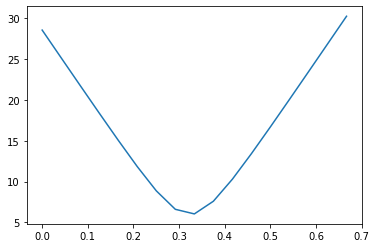

In [17]:
# ephemeris = ephemeris.to_pandas()
import pylab as plt
plt.plot(ephemeris['datetime_jd']-ephemeris['datetime_jd'][0],ephemeris['delta']*23500)

In [18]:
ephemeris['delta (Rt)'] = ephemeris['delta']*u.au.to(u.R_earth)
ephemeris

targetname,datetime_str,datetime_jd,H,G,solar_presence,flags,RA,DEC,RA_app,DEC_app,RA_rate,DEC_rate,AZ,EL,AZ_rate,EL_rate,sat_X,sat_Y,sat_PANG,siderealtime,airmass,magextinct,V,surfbright,illumination,illum_defect,sat_sep,sat_vis,ang_width,PDObsLon,PDObsLat,PDSunLon,PDSunLat,SubSol_ang,SubSol_dist,NPole_ang,NPole_dist,EclLon,EclLat,r,r_rate,delta,delta_rate,lighttime,vel_sun,vel_obs,elong,elongFlag,alpha,lunar_elong,lunar_illum,sat_alpha,sunTargetPA,velocityPA,OrbPlaneAng,constellation,TDB-UT,ObsEclLon,ObsEclLat,NPole_RA,NPole_DEC,GlxLon,GlxLat,solartime,earth_lighttime,RA_3sigma,DEC_3sigma,SMAA_3sigma,SMIA_3sigma,Theta_3sigma,Area_3sigma,RSS_3sigma,r_3sigma,r_rate_3sigma,SBand_3sigma,XBand_3sigma,DoppDelay_3sigma,true_anom,hour_angle,alpha_true,PABLon,PABLat,delta (Rt)
---,---,d,mag,---,---,---,deg,deg,deg,deg,arcsec / h,arcsec / h,deg,deg,arcsec / min,arcsec / min,arcsec,arcsec,deg,---,---,mag,mag,mag / arcsec2,%,arcsec,arcsec,---,arcsec,deg,deg,deg,deg,deg,arcsec,deg,arcsec,deg,deg,AU,km / s,AU,km / s,min,km / s,km / s,deg,---,deg,deg,%,deg,deg,deg,deg,---,s,deg,deg,deg,deg,deg,deg,---,min,arcsec,arcsec,arcsec,arcsec,deg,arcsec2,arcsec,km,km / s,Hz,Hz,s,deg,---,deg,deg,deg,
str24,str17,float64,float64,float64,str1,str1,float64,float64,float64,float64,float64,float64,int32,int32,int32,int32,float64,float64,float64,int32,int32,int32,float64,float64,float64,float64,float64,str1,float64,int32,int32,int32,int32,float64,float64,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,float64,float64,float64,float64,float64,float64,float64,str3,float64,float64,float64,int32,int32,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64
99942 Apophis (2004 MN4),2029-Apr-13 14:00,2462240.083333333,19.7,0.25,,,199.40863,-23.50006,199.81752,-23.65754,-5360.96,3410.738,--,--,--,--,631221.251,-118585.98,171.459,--,999,--,5.846,3.5,98.40135,0.0062,595632.2,*,0.386215,--,--,--,--,189.21,0.05,--,--,203.5235,-0.0153,1.004006639315,-5.1713083,0.00121380561163,-6.0084236,0.01009491,28.3725786,6.2062254,165.4534,/T,14.5288,168.5,0.2746,0.0195,9.313,291.113,14.32114,Hya,69.185627,207.2867238,-14.1617002,--,--,310.670739,38.975281,--,0.0,4.04,2.224,4.183,1.941,-17.037,25.51,4.612,0.7295,1.5e-06,0.47,1.72,5e-06,233.8672,--,14.5276,205.1673,-7.0907,28.46972216546607
99942 Apophis (2004 MN4),2029-Apr-13 15:00,2462240.125,19.7,0.25,,,197.58134,-22.41211,197.98688,-22.57133,-6852.18,4481.356,--,--,--,--,624553.693,-114729.77,163.603,--,999,--,5.549,3.481,98.545,0.0064,598062.0,*,0.438409,--,--,--,--,197.56,0.05,--,--,203.5617,-0.0129,1.003881609072,-5.2217854,0.00106929958825,-5.9997025,0.00889309,28.3840691,6.2537552,166.1283,/T,13.8567,170.1,0.2514,0.0162,17.662,291.775,13.8479,Vir,69.185626,205.25332,-13.8133257,--,--,308.660845,40.24703,--,0.0,4.562,2.545,4.739,2.196,-17.831,32.69,5.223,0.6929,2e-06,0.61,2.21,5e-06,234.1386,--,13.8562,204.1862,-6.9128,25.08034391787315
99942 Apophis (2004 MN4),2029-Apr-13 16:00,2462240.166666667,19.7,0.25,,,195.227,-20.95412,195.62849,-21.11534,-9061.07,6126.327,--,--,--,--,616011.819,-109542.37,152.451,--,999,--,5.22,3.467,98.64035,0.0069,599744.6,*,0.506718,--,--,--,--,209.29,0.06,--,--,203.6,-0.0105,1.003755194458,-5.2873745,0.00092514985712,-5.9771721,0.00769424,28.4006752,6.3154553,166.5957,/T,13.3917,171.5,0.2313,0.0129,29.389,292.55,13.19975,Vir,69.185626,202.5947254,-13.3309644,--,--,305.907991,41.860518,--,0.0,5.229,2.966,5.455,2.525,-18.764,43.28,6.012,0.6747,2.7e-06,0.81,2.95,5e-06,234.5186,--,13.3923,202.8951,-6.6705,21.699322479039406
99942 Apophis (2004 MN4),2029-Apr-13 17:00,2462240.208333333,19.7,0.25,,,192.08027,-18.90905,192.47684,-19.0725,-12522.7,8816.47,--,--,--,--,604652.687,-102242.24,136.858,--,999,--,4.86,3.472,98.60134,0.0084,599066.6,*,0.599597,--,--,--,--,225.56,0.07,--,--,203.6382,-0.0081,1.003626943009,-5.3762055,0.00078184274187,-

In [19]:
ephemeris = ephemeris.to_pandas()

In [20]:
ephemeris.to_csv("../Data/ephemeris3.csv")
# vectors.to_pandas().to_excel("/gdrive/MyDrive/Apophis/Data/vectors.xlsx")